In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_3301393/3750707140.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(uniq))


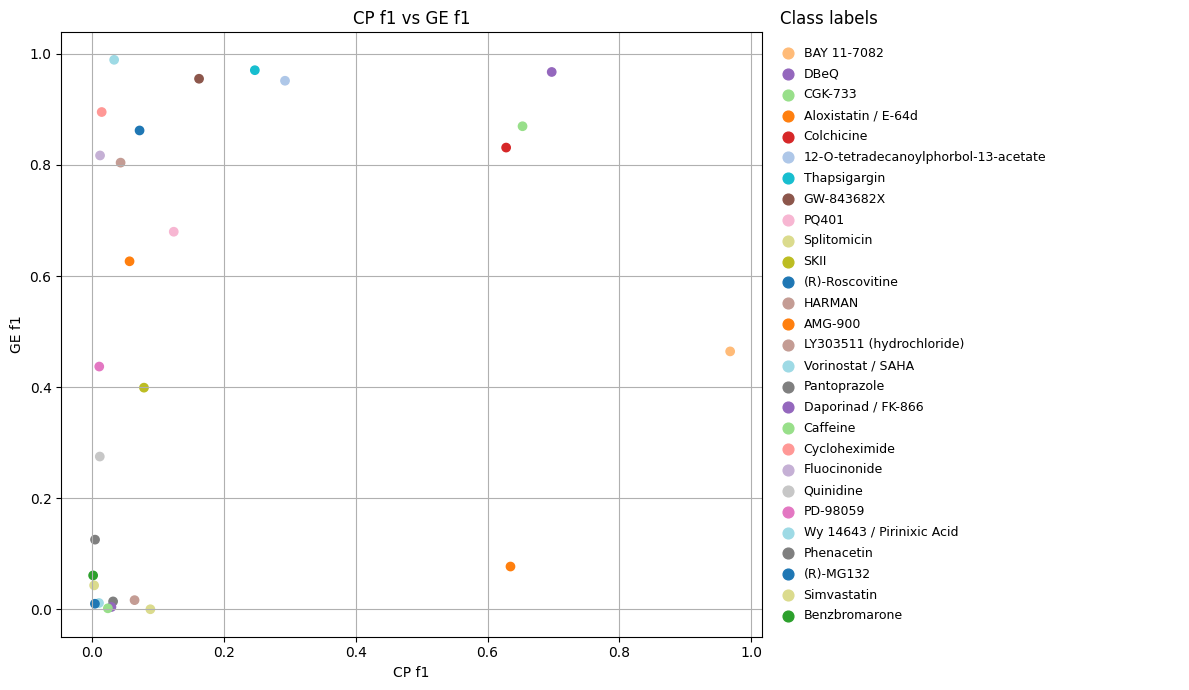

In [16]:
PATH = "per_class.csv"  # <- 네 경로로

df = pd.read_csv(PATH, header=None, names=["legend", "CP f1", "GE f1"])
df["CP f1"] = pd.to_numeric(df["CP f1"], errors="coerce")
df["GE f1"] = pd.to_numeric(df["GE f1"], errors="coerce")
df = df.dropna(subset=["CP f1", "GE f1"]).reset_index(drop=True)

# legend별 색 할당
uniq = sorted(df["legend"].astype(str).unique())
cmap = plt.cm.get_cmap("tab20", len(uniq))
color_map = {name: cmap(i) for i, name in enumerate(uniq)}
df["color"] = df["legend"].astype(str).map(color_map)

# 보기 좋게: CP f1 기준 정렬(원하면 GE로 바꿔도 됨)
df = df.sort_values(["CP f1", "GE f1"], ascending=False).reset_index(drop=True)

fig, (ax, ax_leg) = plt.subplots(
    1, 2, figsize=(12, 7),
    gridspec_kw={"width_ratios": [3.5, 2.0]}
)

# 왼쪽: scatter
ax.scatter(df["CP f1"], df["GE f1"], c=df["color"].tolist())
ax.set_xlabel("CP f1")
ax.set_ylabel("GE f1")
ax.set_title("CP f1 vs GE f1")
ax.grid(True)

# 오른쪽: 텍스트 legend panel
ax_leg.axis("off")
ax_leg.set_title("Class labels", loc="left")

# 텍스트 배치(위에서 아래로)
n = len(df)
for i, row in df.iterrows():
    y = 1 - (i + 1) / (n + 1)   # (0,1) 좌표계로 균등 배치
    # 색 점
    ax_leg.scatter([0.02], [y], s=60, color=row["color"], transform=ax_leg.transAxes)
    # 이름 + 값(원하면 값 표시 제거 가능)
    ax_leg.text(
        0.06, y,
        f'{row["legend"]}',
        transform=ax_leg.transAxes,
        va="center",
        fontsize=9
    )

plt.tight_layout()
plt.show()

/tmp/ipykernel_3239714/2407176815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (adata.obs.groupby("Sample_ID").size()
/tmp/ipykernel_3239714/2407176815.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  - adata.obs.groupby("Sample_ID")["postqc_cells"].first()


0.0    94
Name: count, dtype: int64

/tmp/ipykernel_3239714/2407176815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (adata.obs.groupby("Sample_ID").size()
/tmp/ipykernel_3239714/2407176815.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  - adata.obs.groupby("Sample_ID")["postqc_cells"].first()


0.0    94
Name: count, dtype: int64

/tmp/ipykernel_3239714/2407176815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (adata.obs.groupby("Sample_ID").size()
/tmp/ipykernel_3239714/2407176815.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  - adata.obs.groupby("Sample_ID")["postqc_cells"].first()


0.0    94
Name: count, dtype: int64